# Ejemplo de como hacer la calibración de sensores de bajo costo usando herramientas de Machine Learning 

En el siguiente ejemplo se han usado unos datos de variables del aire a partir de un sensor de referencia (propietario) y un sensor de bajo costo para un proyecto de creación de estaciones de monitoreo. Los datos han sido tomados de (A machine learning calibration model using random forests to improve sensor performance for lower-cost air quality monitoring. Zimmerman, Naomi; Presto, Albert; Kumar, Sriniwasa; Gu, Jason; Hauryliuk, Aliaksei; Robinson, Ellis; Robinson, Allen; Subramanian, R. online at https://doi.org/10.5281/zenodo.1146109 (Zimmerman et al., 2018).)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

### Importando datos....

In [2]:
collocation=pd.read_excel("Collocation_Data.xlsx",header=0,skiprows=5)
print(np.shape(collocation))

(17856, 139)


In [3]:
collocation.head(5)

,datetime_15min,CO_ref_ppb,CO2_ref,SO2_ref,NO2_ref,O3_ref,CO_100,SO2_100,NO2_100,O3_100,...,CO2_122,T_122,RH_122,CO_125,SO2_125,NO2_125,O3_125,CO2_125,T_125,RH_125
0,2016-08-05 00:00:00,181.996,427.154,NaN,NaN,26.0135,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,35.9016,-29.5410,-2.606560,4.704920,653.197,22.9951,40.9885
1,2016-08-05 00:15:00,183.748,428.735,NaN,NaN,24.5908,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52.9831,-13.2542,-1.372880,-0.118644,652.898,22.9237,39.6102
2,2016-08-05 00:30:00,188.848,430.316,NaN,NaN,22.2370,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,55.6613,-10.1452,-0.870968,3.951610,650.726,22.6935,39.2274
3,2016-08-05 00:45:00,191.789,432.121,NaN,NaN,20.9494,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,48.3115,-18.2951,-2.163930,1.524590,648.246,22.3918,38.9311
4,2016-08-05 01:00:00,186.363,432.301,NaN,NaN,20.5251,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,51.7581,-19.7903,-1.161290,2.112900,646.048,22.2097,38.8661


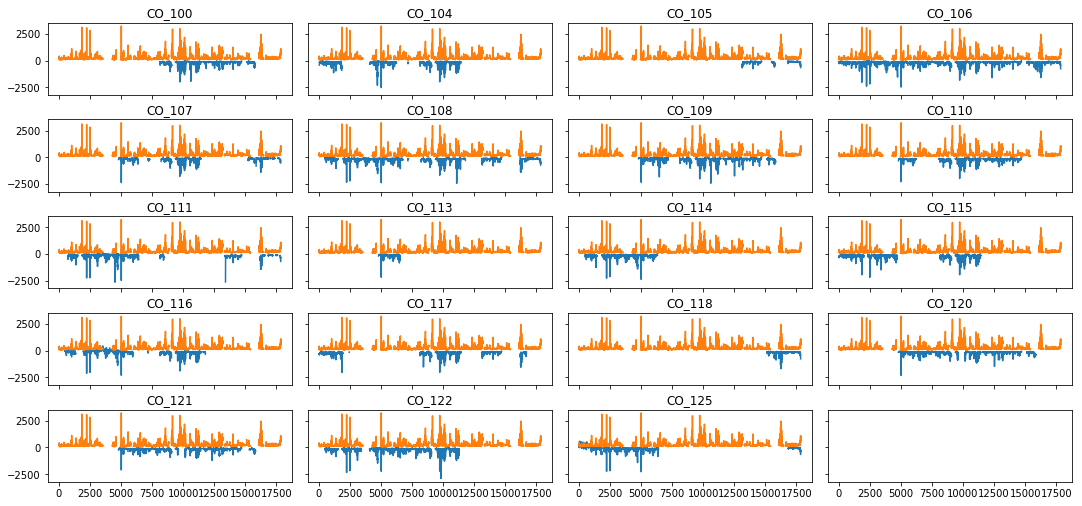

In [4]:
col=["CO_100","CO_104","CO_105","CO_106","CO_107","CO_108","CO_109","CO_110","CO_111","CO_113","CO_114",
          "CO_115","CO_116","CO_117","CO_118","CO_120","CO_121","CO_122","CO_125"]
fig, ax = plt.subplots(nrows=5,ncols=4,figsize=(15,7),sharey=True,sharex=True)
ax[0, 0].plot(collocation[col[0]],label="Low-cost sensor")
ax[0, 0].plot(collocation["CO_ref_ppb"],label="Reference")
ax[0, 0].set_title(col[0])
ax[0, 1].plot(collocation[col[1]],label="Low-cost sensor")
ax[0, 1].plot(collocation["CO_ref_ppb"],label="Reference")
ax[0, 1].set_title(col[1])
ax[0, 2].plot(collocation[col[2]],label="Low-cost sensor")
ax[0, 2].plot(collocation["CO_ref_ppb"],label="Reference")
ax[0, 2].set_title(col[2])
ax[0, 3].plot(collocation[col[3]],label="Low-cost sensor")
ax[0, 3].plot(collocation["CO_ref_ppb"],label="Reference")
ax[0, 3].set_title(col[3])
ax[1, 0].plot(collocation[col[4]],label="Low-cost sensor")
ax[1, 0].plot(collocation["CO_ref_ppb"],label="Reference")
ax[1, 0].set_title(col[4])
ax[1, 1].plot(collocation[col[5]],label="Low-cost sensor")
ax[1, 1].plot(collocation["CO_ref_ppb"],label="Reference")
ax[1, 1].set_title(col[5])
ax[1, 2].plot(collocation[col[6]],label="Low-cost sensor")
ax[1, 2].plot(collocation["CO_ref_ppb"],label="Reference")
ax[1, 2].set_title(col[6])
ax[1, 3].plot(collocation[col[7]],label="Low-cost sensor")
ax[1, 3].plot(collocation["CO_ref_ppb"],label="Reference")
ax[1, 3].set_title(col[7])
ax[2, 0].plot(collocation[col[8]],label="Low-cost sensor")
ax[2, 0].plot(collocation["CO_ref_ppb"],label="Reference")
ax[2, 0].set_title(col[8])
ax[2, 1].plot(collocation[col[9]],label="Low-cost sensor")
ax[2, 1].plot(collocation["CO_ref_ppb"],label="Reference")
ax[2, 1].set_title(col[9])
ax[2, 2].plot(collocation[col[10]],label="Low-cost sensor")
ax[2, 2].plot(collocation["CO_ref_ppb"],label="Reference")
ax[2, 2].set_title(col[10])
ax[2, 3].plot(collocation[col[11]],label="Low-cost sensor")
ax[2, 3].plot(collocation["CO_ref_ppb"],label="Reference")
ax[2, 3].set_title(col[11])
ax[3, 0].plot(collocation[col[12]],label="Low-cost sensor")
ax[3, 0].plot(collocation["CO_ref_ppb"],label="Reference")
ax[3, 0].set_title(col[12])
ax[3, 1].plot(collocation[col[13]],label="Low-cost sensor")
ax[3, 1].plot(collocation["CO_ref_ppb"],label="Reference")
ax[3, 1].set_title(col[13])
ax[3, 2].plot(collocation[col[14]],label="Low-cost sensor")
ax[3, 2].plot(collocation["CO_ref_ppb"],label="Reference")
ax[3, 2].set_title(col[14])
ax[3, 3].plot(collocation[col[15]],label="Low-cost sensor")
ax[3, 3].plot(collocation["CO_ref_ppb"],label="Reference")
ax[3, 3].set_title(col[15])
ax[4, 0].plot(collocation[col[16]],label="Low-cost sensor")
ax[4, 0].plot(collocation["CO_ref_ppb"],label="Reference")
ax[4, 0].set_title(col[16])
ax[4, 1].plot(collocation[col[17]],label="Low-cost sensor")
ax[4, 1].plot(collocation["CO_ref_ppb"],label="Reference")
ax[4, 1].set_title(col[17])
ax[4, 2].plot(collocation[col[18]],label="Low-cost sensor")
ax[4, 2].plot(collocation["CO_ref_ppb"],label="Reference")
ax[4, 2].set_title(col[18])
plt.tight_layout(pad=0.6, w_pad=0.9, h_pad=0.5)


plt.show()

Podemos ver que en todas las estaciones las cantidades de datos faltantes o no medidos respecto de la estación de referencia son muy grandes. Esto puede deberse a que las estaciones de monitoreo (low-cost) fallan, o no estaban instaladas para el momento, o no midieron en algún intervalo. Esto implica que la calibración puede hacerse de dos maneras posibles, dependiendo de lo que se quiera en el momento y dependiendo de la separación espacial entre las estaciones:

* Puede hacerse una calibración indicidual de cada estación si estas estpabn muy separadas unas de las otras respectivamente En este caso se usarán los datos de la estación de referencia para dicha calibración.
* Puede tomarse el conjunto de datos de todas las estaciones low-cost y todas las estaciones de referencia. Esto a la vez implica que para un mismo intervalo de tiempo se tienen varios datos, lo cual robustece y agrega valor a la **calibración cruzada**.

Además de lo anterior se puede hacer una calibración muy robusta de tres maneras distintas:

* **Calibración Lineal:** La calibración de laboratorio sigue un modelo de regresión lineal univariable estándar de la señal de red de regresión (CO, NO2, CO2, etc) frente a la concentración de gas medida por una estación de referencia (Ec. 1):
$$y^{(X_i)}_{referencia}=\alpha_0+\alpha_1\times X_i$$.

* **Calibración múltiple:** Puede usarse un modelo MLR (Multiple Linear Regression) para calibrar la salida de cada sensor utilizando la respuesta neta del sensor de referencia (p. ej., CO para el sensor de CO), T y RH como variables explicativas (ecuación 2), similar al enfoque descrito en una un informe reciente de la Unión Europea sobre protocolos para evaluar y calibrar sensores de bajo costo (Spinelle et al., 2013). $X_i$ representa la variable a calibrar, $Y_{2,i}$ representa otras variables predictoras que pueden ayudar a crear un mejor modelo, de estas variables hay $N$.
$$y^{(X_i)}_{referencia}=\beta_0+\beta_1\times X_i+\sum_{i=1}^N\beta_{2,i}\times Y_i$$.

* **Modelo de bosque aleatorio (Random Forest):** Un modelo de RF es un algoritmo de aprendizaje automático para resolver problemas de regresión o clasificación (Breiman, 2001). Funciona mediante la construcción de un conjunto de árboles de decisión utilizando un conjunto de datos de entrenamiento; el valor medio de ese conjunto de árboles de decisión se utiliza para predecir el valor de los nuevos datos de entrada. Brevemente, para desarrollar un modelo de bosque aleatorio, el usuario especifica el número máximo de árboles que conforman el bosque, y cada árbol se construye utilizando una muestra aleatoria de arranque del conjunto de datos de entrenamiento.

* Adicionalmente pueden usarse otros modelos usando machine learning, digamos por ejemplo, redes neuronales, Support Vector Machine, etc.

* Además de todo esto es posible establecer estratificaciones. Los sensores de bajo costo algunas veces no miden homogeneamente para todo el rango de valores posibles del sensor, en este caso uno pudiera realizar modelos seccionados para rangos de medidas, por ejemplo, podemos realizar un modelo para valores de concentración:
    *  Modelo 1 --> $y_{estimado}$: CO>1250
    *  Modelo 2 --> $y_{estimado}$: 1250>CO>500
    *  Modelo 3 --> $y_{estimado}$: 500>CO>250
    *  Modelo 4 --> $y_{estimado}$: 250>CO>0

### Enfocando solo en los datos de CO para la estación X...

Aquí vamos a eliminar todos los datos para los cuales ambas estaciones no midieron individualmente o ambas. Nos quedamos sólo con los datetime para los cuales se tiene a la vez datos de la estación low-cost y de la estación de referencia.

In [5]:
station,station_ref,station_ref_T,station_ref_RH="CO_106","CO_ref_ppb","T_106","RH_106"
data=collocation[(collocation[station].notnull())&(collocation[station_ref].notnull())]\
.reset_index(drop=True)

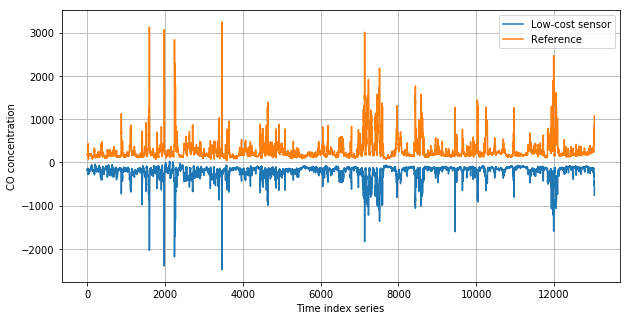

In [6]:
plt.figure(figsize=(10,5))
plt.plot(data[station],label="Low-cost sensor")
plt.plot(data[station_ref],label="Reference")
plt.ylabel(r"CO concentration")
plt.xlabel("Time index series")
plt.legend(loc='best')
plt.grid()
plt.show()

## Primer modelo: simple, regresión lineal entre la estación de referencia y la estación construida...

In [7]:
import statsmodels.api as sm

y = data[station_ref]
X = data[station]
X_c = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order
model = sm.OLS(y, X_c).fit()
predictions = model.predict(X_c) # make the predictions by the model

# Print out the statistics
model.summary()

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CO_ref_ppb   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 1.562e+05
Date:                Sat, 15 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:53:07   Log-Likelihood:                -73094.
No. Observations:               13035   AIC:                         1.462e+05
Df Residuals:                   13033   BIC:                         1.462e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.6187      0.935    -29.548      0.000     -29.451     -25.787
CO_106        -1.3957      0.004   -395.267      0.000      -1.403      -1.389
==============================================================================
Omnibus:                     3343.651   Durbin-Watson:                   0.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89708.791
Skew:                          -0.640   Prob(JB):                         0.00
Kurtosis:                      15.788   Cond. No.                         428.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
X=np.array(X).reshape(-1,1)
model = lm.fit(X,y)
predictions = lm.predict(X)
print(predictions)

[ 213.43784484  210.19154526  218.39801194 ...  571.30259664  841.69032149
 1029.12713697]


In [9]:
lm.score(X,y)

0.9230041629827999

In [10]:
print(lm.coef_,lm.intercept_)

[-1.3956576] -27.61873991987642


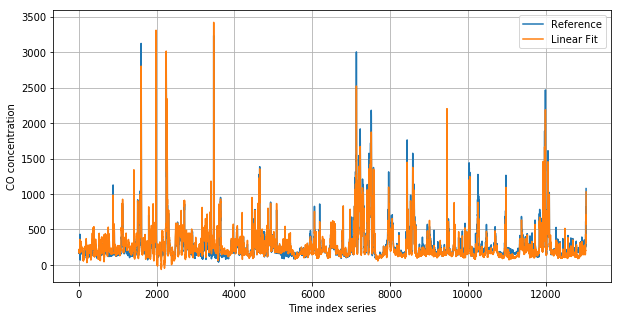

In [11]:
plt.figure(figsize=(10,5))
#plt.plot(data_CO_106["CO_106"],label="Low-cost sensor")
plt.plot(data[station_ref],label="Reference")
plt.plot((data[station]*lm.coef_+lm.intercept_),label="Linear Fit")
plt.ylabel(r"CO concentration")
plt.xlabel("Time index series")
plt.legend(loc='best')
plt.grid()
plt.show()

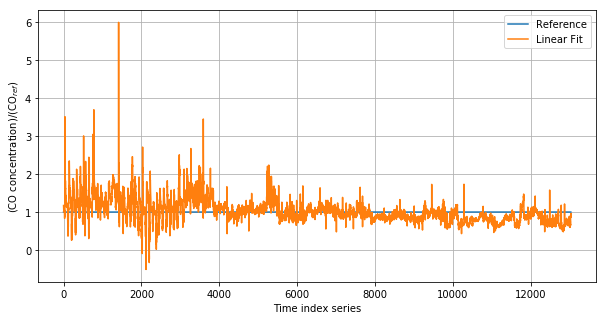

In [12]:
plt.figure(figsize=(10,5))
plt.plot(data[station_ref]/data[station_ref],label="Reference")
plt.plot((data[station]*lm.coef_+lm.intercept_)/data[station_ref],label="Linear Fit")
plt.ylabel(r"(CO concentration)/(CO$_{ref}$)")
plt.xlabel("Time index series")
plt.legend(loc='best')
plt.grid()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, 
                                                    random_state=42) 
  
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_,reg.intercept_)
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

Coefficients: 
 [-1.39379152] -27.273315920518712
Variance score: 0.9416300772791885


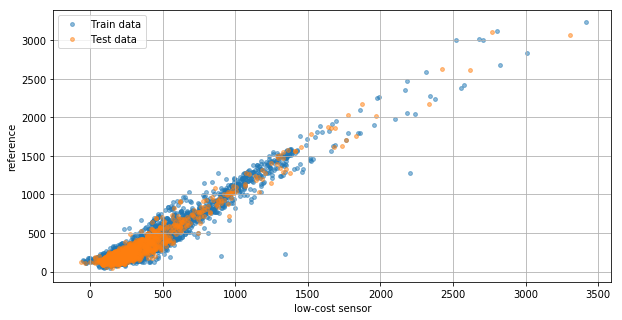

In [14]:
plt.figure(figsize=(10,5))
axe=np.linspace(data[station].min()-0.2,data[station].max()+0.2,10)
plt.scatter(reg.predict(X_train),y_train, s = 15, label = 'Train data',alpha=0.5) 
plt.scatter(reg.predict(X_test),y_test, s = 15, label = 'Test data',alpha=0.5)
plt.ylabel(r"reference")
plt.xlabel("low-cost sensor")
plt.legend()
plt.grid()
plt.show()

## Segundo modelo: simple, regresión lineal múltiple entre la estación de referencia y la estación construida pero haciendo uso de las variables predictoras auxiliares de Temperatura y Humedad Relativa...

In [15]:
y = data[station_ref]
X = data[[station,station_ref_T,station_ref_RH]]

In [16]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
#print('Variance score: {}'.format(regr.score(X_test, y_test))) 

Intercept: 
 59.470875155218096
Coefficients: 
 [-1.41372529 -3.35126343 -0.68715329]


In [18]:
# with statsmodels
X_c2 = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X_c2).fit()
predictions = model.predict(X_c2) 
 
model.summary()

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CO_ref_ppb   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 7.423e+04
Date:                Sat, 15 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:53:10   Log-Likelihood:                -70935.
No. Observations:               13035   AIC:                         1.419e+05
Df Residuals:                   13031   BIC:                         1.419e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.4709      3.050     19.502      0.000      53.493      65.448
CO_106        -1.4137      0.003   -459.258      0.000      -1.420      -1.408
T_106         -3.3513      0.048    -70.373      0.000      -3.445      -3.258
RH_106        -0.6872      0.039    -17.546      0.000      -0.764      -0.610
==============================================================================
Omnibus:                     4446.709   Durbin-Watson:                   0.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           331482.427
Skew:                          -0.756   Prob(JB):                         0.00
Kurtosis:                      27.658   Cond. No.                     1.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

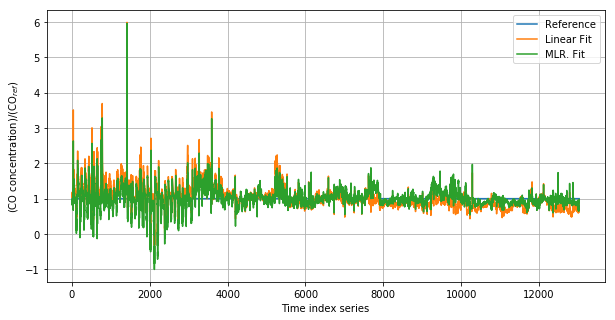

In [19]:
plt.figure(figsize=(10,5))
plt.plot(data[station_ref]/data[station_ref],label="Reference")
plt.plot((data[station]*reg.coef_+reg.intercept_)/data[station_ref],label="Linear Fit")
plt.plot((data[station]*regr.coef_[0]+data[station_ref_T]*regr.coef_[1]+data[station_ref_RH]*regr.coef_[2]+regr.intercept_)/data[station_ref],label="MLR. Fit")

plt.ylabel(r"(CO concentration)/(CO$_{ref}$)")
plt.xlabel("Time index series")
plt.legend(loc='best')
plt.grid()
plt.show()

# Desarrollando random forest para el conjunto de datos usando SKLearn (machine Learning)...

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
from sklearn.preprocessing import LabelEncoder 
from numpy.core.umath_tests import inner1d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  if __name__ == '__main__':


In [21]:
train_features,test_features,train_labels,test_labels=train_test_split(X,y,test_size=0.3,random_state=0)
# Instantiate model with 1000 decision trees
rf=RandomForestRegressor(n_estimators=800,random_state=0)#,max_features="sqrt",criterion="mse"
# Train the model on training data
rf.fit(train_features,train_labels);
# Use the forest's predict method on the test data
predictions=rf.predict(test_features)
# Calculate the absolute errors
errors=abs(predictions-test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))
# Calculate mean absolute percentage error (MAPE)
mape=100*abs(errors/test_labels)
# Calculate and display accuracy
accuracy=100-np.mean(mape)
print('Accuracy:', accuracy)

Mean Absolute Error: 22.843888945026873
Accuracy: 90.02156478682522


No handles with labels found to put in legend.


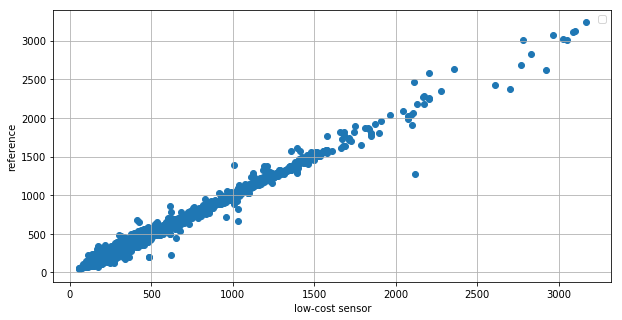

In [22]:
plt.figure(figsize=(10,5))
axe=np.linspace(data[station].min()-0.2,data[station].max()+0.2,10)
plt.scatter(rf.predict(X),data[station_ref],label='',lw=1,marker='o') 
plt.ylabel(r"reference")
plt.xlabel("low-cost sensor")
plt.legend()
plt.grid()
plt.show()

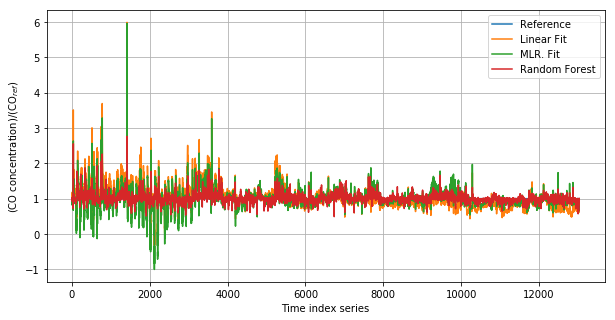

In [23]:
plt.figure(figsize=(10,5))
#plt.plot(data_CO_106["CO_106"],label="Low-cost sensor")
plt.plot(data[station_ref]/data[station_ref],label="Reference")
plt.plot((data[station]*reg.coef_+reg.intercept_)/data[station_ref],label="Linear Fit")
plt.plot((data[station]*regr.coef_[0]+data[station_ref_T]*regr.coef_[1]+data[station_ref_RH]*regr.coef_[2]+regr.intercept_)/data[station_ref],label="MLR. Fit")
plt.plot(rf.predict(X)/data[station_ref],label="Random Forest")
plt.ylabel(r"(CO concentration)/(CO$_{ref}$)")
plt.xlabel("Time index series")
plt.legend(loc='best')
plt.grid()
plt.show()

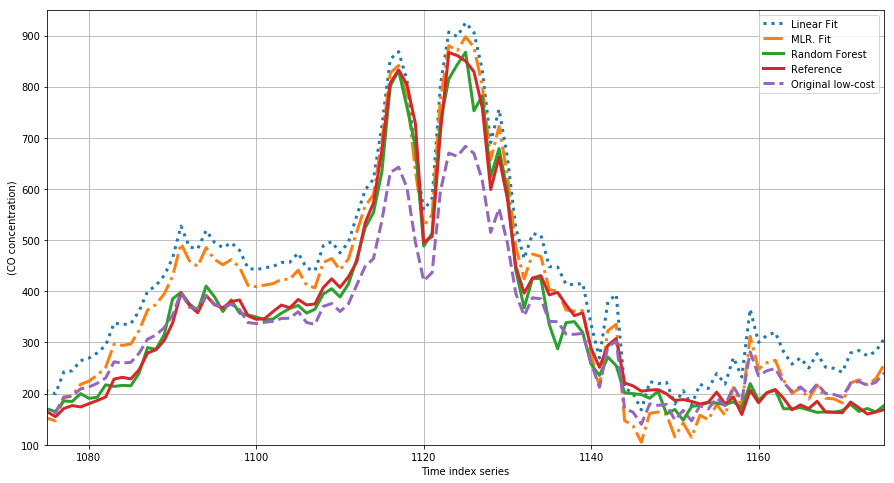

In [40]:
plt.figure(figsize=(15,8))
plt.plot((data[station]*reg.coef_+reg.intercept_),label="Linear Fit",lw=3,linestyle=':')
plt.plot((data[station]*regr.coef_[0]+data[station_ref_T]*regr.coef_[1]+data[station_ref_RH]*regr.coef_[2]+regr.intercept_),label="MLR. Fit",lw=3,linestyle='-.')
plt.plot(rf.predict(X),label="Random Forest",lw=3,linestyle='-')
plt.plot(data[station_ref],label="Reference",lw=3,linestyle='-')
plt.plot(-data[station],label="Original low-cost",lw=3,linestyle='--')
plt.ylabel(r"(CO concentration)")
plt.xlabel("Time index series")
plt.legend(loc='best')
limxi=1075
plt.xlim(limxi,limxi+100)
plt.ylim(100,950)
plt.grid()
plt.show()

## Midiendo el rendimiento de los modelos...

Podemos usar varias métricas para evaluar el rendimiento:
* Mean Absolute Error (MAE): $$MAE=\sum_{i}\frac{|y_i^{est}-y_{ref}|}{N}$$
* Root Mean Square Error (RMSE): $$RMSE=\sqrt{\sum_{i}\frac{(y_i^{est}-y_{ref})^2}{N}}$$
* Mean Relative Error (MRE): $$MRE=\sum_{i}\frac{|y_i^{est}-y_{ref}|}{y_{ref}}$$
* Accuracy (Acc): $$Acc=\sum_{i}\frac{|y_i^{est}-y_{ref}|=0}{N}$$

In [25]:
y_est_L=data[station]*lm.coef_+lm.intercept_
y_est_MLR=data[station]*regr.coef_[0]+data[station_ref_T]*regr.coef_[1]+data[station_ref_RH]*regr.coef_[2]+regr.intercept_
y_est_RF=rf.predict(X)
MAE_L,MAE_MLR=np.mean(np.abs(y_est_L-data[station_ref])),np.mean(np.abs(y_est_MLR-data[station_ref]))
MAE_RF=np.mean(np.abs(y_est_RF-data[station_ref]))
RMSE_L,RMSE_MLR=np.mean((y_est_L-data[station_ref])**2),np.mean((y_est_MLR-data[station_ref])**2)
RMSE_RF=np.mean((y_est_RF-data[station_ref])**2)
MRE_L,MRE_MLR=np.mean(np.abs(y_est_L-data[station_ref])/data[station_ref]),np.mean(np.abs(y_est_MLR-data[station_ref])/data[station_ref])
MRE_RF=np.mean(np.abs(y_est_RF-data[station_ref])/data[station_ref])
Acc_L=1.-(np.count_nonzero(np.round(y_est_L-data[station_ref])))/len(data[station_ref])
Acc_MLR=1.-(np.count_nonzero(np.round(y_est_MLR-data[station_ref])))/len(data[station_ref])
Acc_RF=1.-(np.count_nonzero(np.round(y_est_RF-data[station_ref])))/len(data[station_ref])

In [26]:
table_resume = [["","Intercept","Slope","T-coef","RH-coef","","","",""],\
                       ["Linear",lm.intercept_,lm.coef_[0],"-","-",np.round(MAE_L,3),np.round(RMSE_L,3),np.round(MRE_L,3),np.round(Acc_L,3)],\
                       ["MLR",regr.intercept_,regr.coef_[0],regr.coef_[1],regr.coef_[2],np.round(MAE_MLR,3),np.round(RMSE_MLR,3),np.round(MRE_MLR,3),np.round(Acc_MLR,3)],\
                       ["RF","-","-","-","-",np.round(MAE_RF,3),np.round(RMSE_RF,3),np.round(MRE_RF,3),np.round(Acc_RF,3)]]
pd.DataFrame(table_resume, columns=["Model","c0","c1","c21","c22","MAE","RSME","MRE","Acc"])

,Model,c0,c1,c21,c22,MAE,RSME,MRE,Acc
0,,Intercept,Slope,T-coef,RH-coef,,,,
1,Linear,-27.6187,-1.39566,-,-,47.17,4346.81,0.217,0.007
2,MLR,59.4709,-1.41373,-3.35126,-0.687153,37.314,3120.96,0.174,0.012
3,RF,-,-,-,-,12.751,594.815,0.057,0.046
